<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

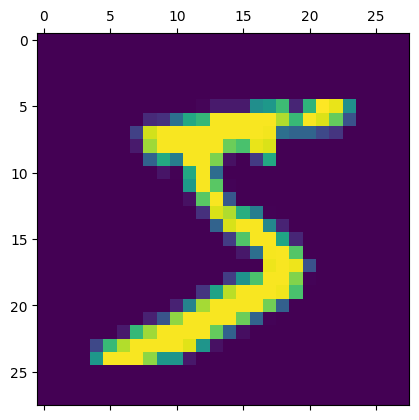

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4724 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2670 - accuracy: 0.9255


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.9268


[0.2680237591266632, 0.926800012588501]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 986us/step


array([3.0979887e-02, 2.2520395e-07, 4.0867325e-02, 9.5537907e-01,
       1.8592514e-03, 9.2387341e-02, 2.1529349e-06, 9.9975401e-01,
       8.3326004e-02, 6.2742186e-01], dtype=float32)

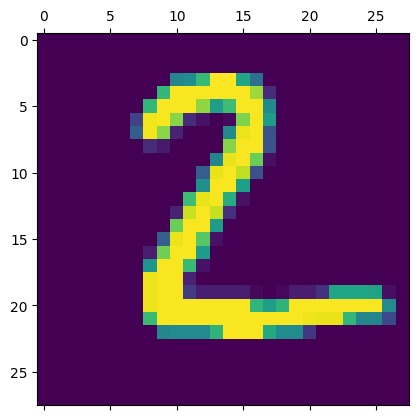

In [17]:
plt.matshow(X_test[1])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    9,  915,   16,    7,    4,   13,   10,   45,    4],
       [   4,    0,   17,  924,    0,   21,    3,   10,   24,    7],
       [   1,    1,    3,    2,  910,    0,   12,    4,   10,   39],
       [  10,    2,    1,   33,    8,  777,   15,    5,   35,    6],
       [  11,    3,    5,    1,    7,   12,  914,    2,    3,    0],
       [   2,    5,   20,    7,    7,    1,    0,  949,    4,   33],
       [   9,    6,    5,   19,    9,   20,    8,   11,  880,    7],
       [  11,    7,    1,   10,   23,    6,    0,   20,    7,  924]])>

Text(33.22222222222222, 0.5, 'Truth')

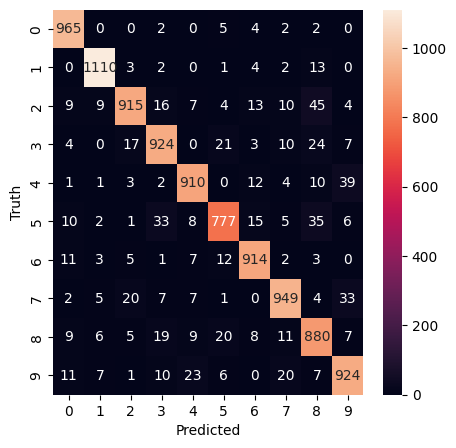

In [22]:
import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2650 - accuracy: 0.9248
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1174 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0644 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0410 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0336 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

In [24]:
model2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0807 - accuracy: 0.9761


[0.0807076245546341, 0.9761000275611877]

313/313 [==============================] - 0s 1ms/step


Text(33.22222222222222, 0.5, 'Truth')

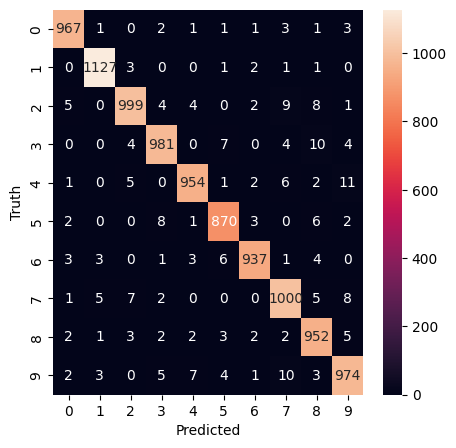

In [25]:
y_predicted = model2.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=13)

Epoch 1/13
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2788 - accuracy: 0.9209
Epoch 2/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1281 - accuracy: 0.9617
Epoch 3/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0906 - accuracy: 0.9730
Epoch 4/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0694 - accuracy: 0.9789
Epoch 5/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0540 - accuracy: 0.9834
Epoch 6/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0439 - accuracy: 0.9863
Epoch 7/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.9894
Epoch 8/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0303 - accuracy: 0.9908
Epoch 9/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9926
Epoch 10/13
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [27]:
model3.evaluate(X_test,y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.0955 - accuracy: 0.9787


[0.095455102622509, 0.9786999821662903]

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def ocrnb(filer):
    myX_test = []
    img = cv2.imread(filer, 0)
    img = cv2.medianBlur(img, 5)
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    # Create subplots
    fig, axs = plt.subplots(1, len(sorted_contours), figsize=(5, 5))
    z=15
    for i, cnt in enumerate(sorted_contours):
        # Get bounding box and extract ROI
        x, y, w, h = cv2.boundingRect(cnt)
        roi = img[y-z:y+h+z, x-z:x+w+z]
        # Resize and normalize the ROI
        roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        roi = roi.astype('float32') / 255
        # Plot images on subplots
        axs[i].imshow(roi)
        axs[i].set_title(f'nb {i}')
        axs[i].axis('off')

        # Append ROI to X_test
        myX_test.append(roi)

    plt.show()

    # Convert list to array
    my_X_test = np.array(myX_test)

    # Flatten the images
    my_X_test_flattened = my_X_test.reshape(len(my_X_test), 28*28)



    # Concatenate all strings within m
    my_y_predicted = model.predict(my_X_test_flattened)
    maxy_predicted = np.argmax(my_y_predicted, axis=1)
    concatenated_string = ''.join(str(elem) for elem in maxy_predicted)
    print("RESULT 1= ", concatenated_string)

    my_y_predicted = model2.predict(my_X_test_flattened)
    maxy_predicted = np.argmax(my_y_predicted, axis=1)
    concatenated_string = ''.join(str(elem) for elem in maxy_predicted)
    print("RESULT 2= ", concatenated_string)


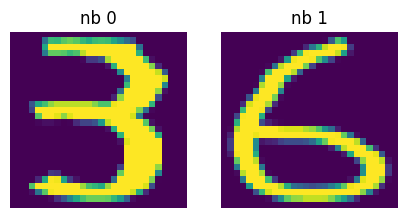

1/1 [==============================] - 0s 22ms/step
RESULT 1=  33
1/1 [==============================] - 0s 16ms/step
RESULT 2=  35


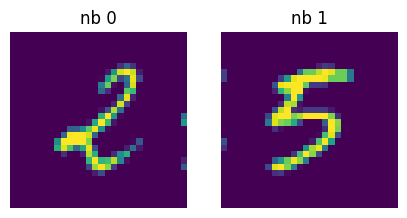

1/1 [==============================] - 0s 10ms/step
RESULT 1=  69
1/1 [==============================] - 0s 22ms/step
RESULT 2=  25


In [48]:
ocrnb("images/36.png")
ocrnb("images/25.png")